### Here we study the nonlinear optical behavior of 2 microcavities. The output of a photonic crystal nanocavity which shows slow relaxation-oscillations is found to be well represented by an ordinary differencial equation model that closely resembles mathematical models that descrive neuronal activity.
The published paper can be found here: https://journals.aps.org/pra/abstract/10.1103/PhysRevA.102.053518

In [1]:
import numpy as np
import pandas as pd
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import os
import math
from math import *
%matplotlib inline

## First, we reproduce the mathematical results of a previous work 

In [224]:
# Reproducting the optical instability model in: https://www.osapublishing.org/oe/fulltext.cfm?uri=oe-20-27-29076&id=247092 for a
# silicon nitride whispering gallery disk resonators

T0=300
Lamb0=1539.31
LambIn=1539.35
nSiN=2
ThOp=2.44e-5
dT1=(ThOp*Lamb0)/nSiN
dT2=-0.227
kSi=130
kSiN=20
cS=700
mSi=9.1459616e-7   #5.385714286*10^-5*); For some reason this value of the mass is not good for both t2 and t3 below
mSiN=2.921285e-13
FWHM=0.046
G12=2.86e-5
G2=0.00110382
co=1
Pabs=75e-6

t1 = mSiN*cS/G12  #This is supposed to be 7.15e-6 seconds, and it is
t2 = mSi*cS/G2    #This is supposed to be 0.58 seconds, and it is with mSi as above
t3 = mSi*cS/G12   #This is supposed to be 22.38522, and it is not unless mSi=9.1459616e-7 Kg

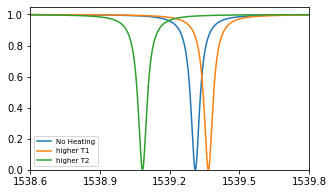

In [225]:
# Check the resonance shift for the disk resonator as the temperature changes

def Transmission(wav,T1,T2):
    return 1-co/(1+((wav-(Lamb0+dT1*(T1-T0)+dT2*(T2-T0)))/(FWHM/2))**2)

x1 = np.arange(1538.6,1540,0.0001)
plt.figure(figsize=(5,3))
plt.plot(x1,Transmission(x1,300,300),label='No Heating')
plt.plot(x1,Transmission(x1,303,300),label='higher T1')
plt.plot(x1,Transmission(x1,300,301),label='higher T2')
plt.xticks(np.arange(1538.6,1539.8,0.3),fontsize = 10);
plt.xlim(left=1538.6, right=1539.8)
plt.ylim(bottom=0, top=1.05)
plt.legend(fontsize=7)

In [226]:
#Implement the model from above and dolve the differential equations

def model(f,t):
    Temp1 = f[0]
    Temp2 = f[1]

    dTemp1 = Pabs*(1-Transmission(LambIn,Temp1,Temp2))/(mSiN*cS)-((Temp1-Temp2)*G12/(mSiN*cS))
    dTemp2 = (Temp1-Temp2)*G12/(mSi*cS)-(Temp2-T0)*G2/(mSi*cS)
    dTdt = [dTemp1,dTemp2]
    return dTdt

f0 = [300,300]

t = np.arange(0,10,0.001)
f = odeint(model,f0,t)


Text(0.5, 1.0, 'Intensity Oscillations')

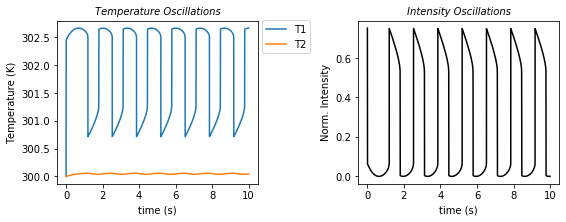

In [227]:
#Plot the results

fig, (ax1, ax2)=plt.subplots(1,2,figsize=(9,3))
plt.subplots_adjust(wspace=0.5)

ax1.plot(t,f[:,0],label='T1')
ax1.plot(t,f[:,1],label='T2')
ax2.plot(t,Transmission(LambIn,f[:,0],f[:,1]),'k')
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Temperature (K)')
ax1.legend(loc=(1.02,0.8))
ax1.set_title('Temperature Oscillations', fontsize=10, style='italic')
ax2.set_xlabel('time (s)')
ax2.set_ylabel('Norm. Intensity')
ax2.set_title('Intensity Oscillations', fontsize=10, style='italic')

## Our experimental data and model fitting 

In [8]:
#Load an experimental data trace coming from the tranmission of a 1d photonic crystal nanocavity

prova = np.loadtxt('trace.txt')
prova

array([[0.00000000e+00, 3.53400841e-01],
       [2.00000000e-04, 3.49876445e-01],
       [4.00000000e-04, 3.55745584e-01],
       ...,
       [1.61496000e+01, 9.31518363e-01],
       [1.61498000e+01, 9.31518363e-01],
       [1.61500000e+01, 9.36207850e-01]])

Text(0.5, 1.0, 'Oscillation trace')

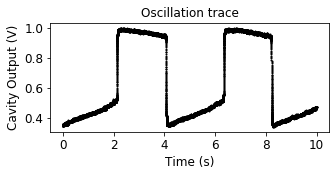

In [9]:
#Call the 2 different columns of the 2D array, and plot

time = prova[0:50000,0]
#time = np.arange(0,10,2e-4)
Output = prova[0:50000,1]
#Intensity = prova[0:50000]

plt.figure(figsize=(5,2))
plt.plot(time,Output,'k.', markersize = 2)
plt.xlabel('Time (s)', fontsize = 12)
plt.ylabel('Cavity Output (V)', fontsize = 12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Oscillation trace', fontsize = 12)
#plt.tight_layout()

In [276]:
#Implement the physical model that allows to reproduce the oscillations observed and solve the differential equations
# details here: https://journals.aps.org/pra/abstract/10.1103/PhysRevA.102.053518
def  Intensity(r,h,x,y): 
    return r+h*(1/(1+(delta+x+y)**2))

def calcolo(a,b,eps,delta,Pin,f):
    def modello(l,s):
        phi = l[0]
        teta = l[1]
       
        dphi = (2*pi/a)*((8.3e5*Pin/(1+(delta+phi+teta)**2)) - phi)
        dteta = -(eps/a)*((b*8.3e5*Pin/(1+(delta+phi+teta)**2)) + teta)
        dA = [dphi,dteta]
        return dA

    l0 = [0.5,f]

    s = np.arange(0,10,0.001)
    return odeint(modello,l0,s)

L1 = calcolo(0.0136,0.77,0.0028274,-1.08,2.35e-6,-0.995)
L2 = calcolo(0.01111,0.77,0.0029845,-1.08,2.25e-6,-0.922)
L3 = calcolo(0.0125,0.762,0.0018,-1.08,2.5e-6,-0.99)
L4 = calcolo(0.0122,0.77,0.0016,-1.08,2.8e-6,-1.33)

(0, 10)

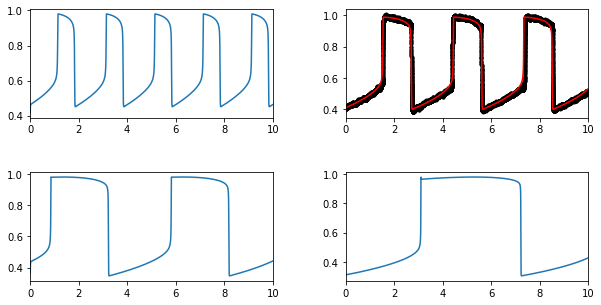

In [291]:
#Plotting four examples of the model's output, one of them fitting very well the experimental data

fig, axs=plt.subplots(2,2,figsize=(10,5))
plt.subplots_adjust(wspace=0.3,hspace=0.5)
axs[0,0].plot(s,Intensity(0.165,0.82,L2[:,0],L2[:,1]))
axs[0, 0].set_xlim(0,10)
axs[0,1].plot(time,Output,'k.')
axs[0,1].plot(s,Intensity(0.13,0.86,L1[:,0],L1[:,1]),'r')
axs[0, 1].set_xlim(0,10)
axs[1,0].plot(s,Intensity(0.112,0.87,L3[:,0],L3[:,1]))
axs[1, 0].set_xlim(0,10)
axs[1,1].plot(s,Intensity(0.13,0.85,L4[:,0],L4[:,1]))
axs[1, 1].set_xlim(0,10)

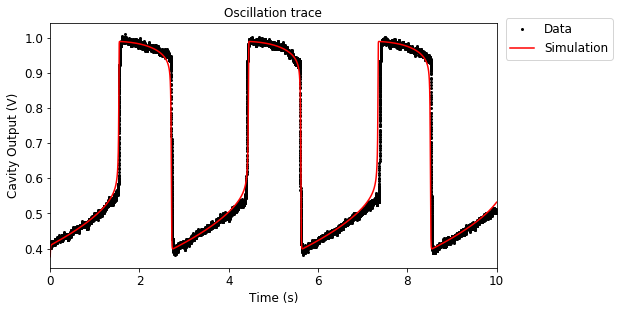

In [280]:
#Final figure

plt.figure(figsize=(8,4.5))
plt.plot(time,Output,'ko', markersize = 2, label='Data')
plt.plot(t,Intensity(0.13,0.86,L1[:,0],L1[:,1]), 'r',label='Simulation')
plt.xlabel('Time (s)', fontsize = 12)
plt.ylabel('Cavity Output (V)', fontsize = 12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(left=0, right=10)
plt.title('Oscillation trace', fontsize = 12)
plt.legend(loc=(1.02,0.85),fontsize=12)
#plt.tight_layout()